
<h1><center> Project 4: A/B Test a New Menu Launch </center></h1>

 ###  Structure of Report
<ol>
<li><a href="#intro">Business and Data Understanding</a></li>
      &nbsp; &emsp; <a href="#1"> a. Goal of project </a>
  <br>&nbsp; &emsp; <a href="#2">b. Dataset overview </a>
  <br>&nbsp; &emsp; <a href="#3">b. Key decision </a>
<li><a href="#wrangling">Building the Training Set</a></li>
<li><a href="#eda">Train your Classification Models</a></li>
<li><a href="#conclusions">Conclusions</a></li>


<a id='intro'></a>
## 1. Business and Data Understanding
<a id='1'></a>
#### a. Goal of project

-  As a business analyst for Round Roasters, a coffee restaurant in the United States of America, I need to analyze the A/B test to figure whether the new menu can drive enough sales to offset the cost of marketing the new menu. A recommendation to whether the Round Roasters chain should launch a new menu should be written.

- Situation:
    - stagnant growth at the coffee chain, 
    - managerment wants to reignite growth at their stores.
- Initiative:
    - Introducing gourmet sandwiches to the menu, along with limited wine offerings. 
    - A television advertising campaign is crucial to drive people into the stores with these new offerings.
- Problems:
    - A significant boost in the company’s marketing budget, 
    - Unknown return on investment (ROI),
    - Current customers will not buy into the new menu offerings.
- Strategy:
    - Test the changes in two cities ( Denver and Chicag) with new television advertising
        - The stores in these two cities (or markets) perform similarly to all stores across the entire chain of stores;
        - A good proxy to predict how well the updated menu performs.
    - Test period: 12 weeks (2016-April-29 to 2016-July-21) compared with 12 weeks last years ((2015-April-29 to 2015-July-21).)
    - Scope: five stores in each of the test markets offered the updated menu along with television advertising.
- Tasks:
    - Analyzing the results of the experiment to determine whether the menu changes should be applied to all stores,
    - Predicting impact to profitability
    - In the data, profit is represented in the gross_margin variable.


<a id='2'></a>
#### b. Datasets overview
- `round-roaster-stores.csv` - This file contains store information for each Round Roaster store in the USA.

- `treatment-stores.csv` - This file contains store information for each store that offered the new menu items.

- `round-roaster-transactions.zip` - This file contains transaction level information for all of Round Roaster's stores

<a id='3'></a>
#### c. Key Decisions:
- What is the performance metric you’ll use to evaluate the results of your test?
> The total gross margin pro week will be used as performance metric to evaluate the results of the test
- What is the test period?
> Test period: 12 weeks (2016-April-29 to 2016-July-21)
- At what level (day, week, month, etc.) should the data be aggregated?
> The data should be aggregated weekly.

<a id='wrangling'></a> 
## 2. Building the Training Set

We must take 76 weeks data because: 
   - data in 1 year (~ 52 weeks)
   - data in 12 weeks in 2015 needed to compare,  
   - data in 12 weeks of test period. 

`Round Roaster Transaction` and `Round Roaster Store` datasets are joined to have 2 datasets:
   - `Result_WeeklyStoreTraffic` which includes about the transaction per week per store
   - `Result2_StoreSalesAnalysisData` which includes Sales and Gross Margin per week per store
 
After that we will combine a list of stores, which does not include new menu, with `Treatment Store` to get:
   - `Result3_Storelist` includes a list of 'Control and Treatment' stores.
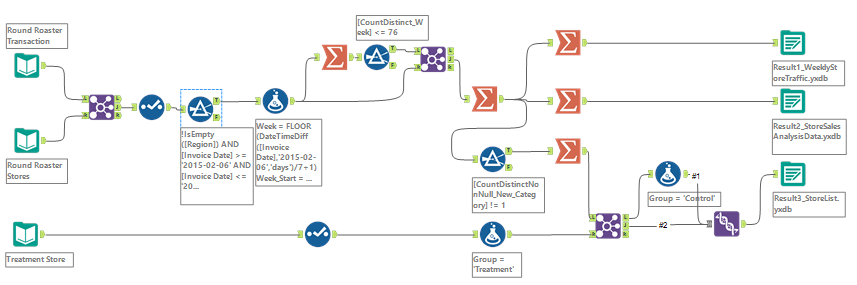
<center> Figure 1: Workflow to Building Datasets </center>

<a id='eda'></a>
## 3. Match Treatment and Control Units
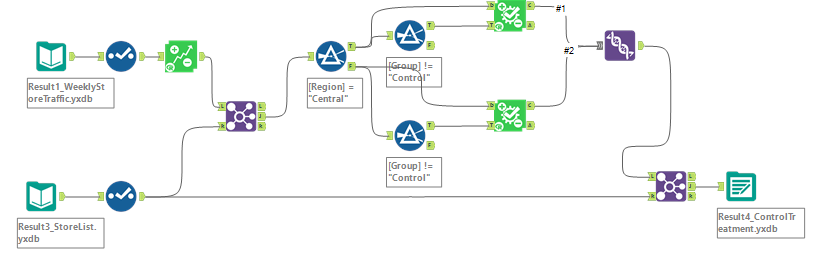
<center> Figure 2: Workflow to Building Treatment and Control Store Pairs </center>

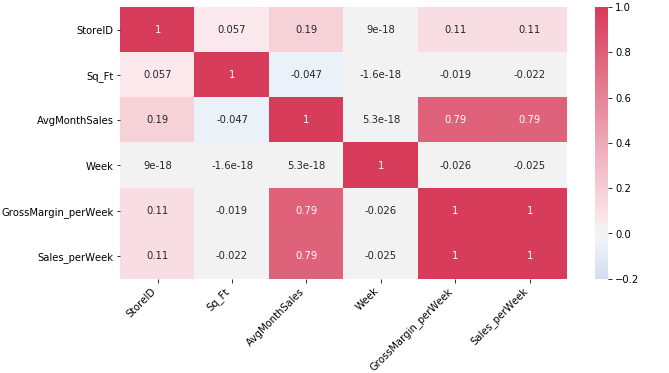
<center> Figure 3: Correlation matrix between performance metric and possible control variable </center>

### a.	What control variables should be considered?

With the correaltion matrix, it is logical that `Week` and `Store ID` play no role with the profit of a store and `Sales_perWeek` and `GrossMargin_perWeek` are duplicated variables.
So to measure the profitablility per week of a store, the considered control variables could be `Sq_Ft` und `AvgMontlySales`. I hope that the larger a store is, the more profit hat the store. The same with `AvgMontlySales`.

### b.	What is the correlation between your each potential control variable and your performance metric?
We have our performance metric is `GrossMargin_perWeek` and potential control variables `Sq_Ft` und `AvgMontlySales`. Using Person correlation we have:
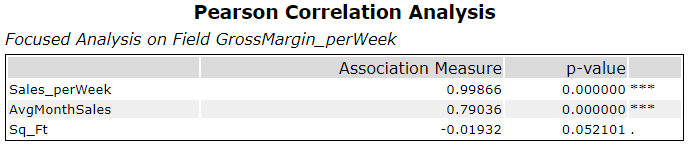

### c.3.	What control variables will you use to match treatment and control stores?

 As mentioned above, `Sales_perWeek` and `GrossMargin_perWeek` are duplicated variables. And with the Pearson Correlation Analysis, `Sq_Ft` is insignificant. So only  `AvgMontlySales` will be used to match treatment and control stores.

### 4.	Please fill out the table below with your treatment and control stores pairs:


| Treatment Store | Control Store 1 | Control Store 2 |
| --- | --- | --- |
| 1664 | 7162 | 8112 |
| 1675 | 1580 | 1807 |
| 1696 | 1964 | 1863 |
| 1700 | 2014 | 1630 |
| 1712 | 8162 | 7434 |
| 2288 | 9081 | 2568 |
| 2293 | 12219 | 9524 |
| 2301 | 3102 | 9238 |
| 2322 | 2409 | 3235 |
| 2341 | 12536 | 2383 |

<a id='conclusions'></a>
## 4.Analysis and Writeup
<a id='11'></a> 
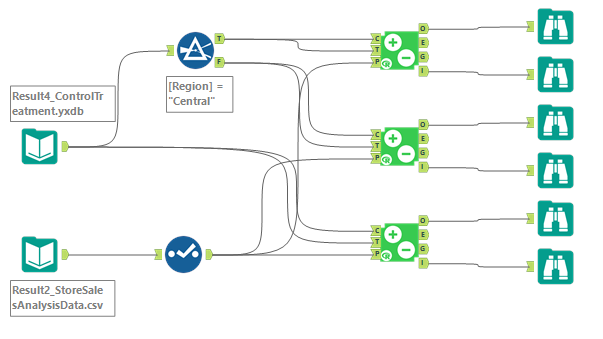
<center> Figure 4: Workflow to get AB Analysis for stores in the central areas </center>

1.	What is your recommendation - Should the company roll out the updated menu to all stores? 
> After using AB Analysis, we can see that the company should definitely roll out the new menu to all stores. Because the very high possibility that the company will gain an average lift in profit of around 40\% for the new menu. This result is far outweigh from an increase of 18% of expectation from management board
2.	What is the lift from the new menu for West and Central regions (include statistical significance)? 
> The average expected impact of the treatment on GrossMargin_perWeek is an increasing of \$835.5 and 526.3 per week per store, aquadately to a lift of 43.5\% and 37.9\% in the central and west areas respectively.

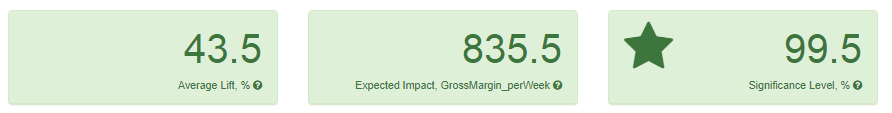
<center> Figure 5: AB Analysis for stores in the central areas </center>

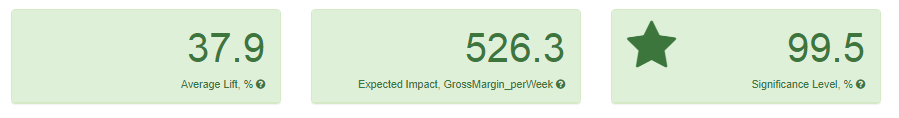
<center> Figure 6: AB Analysis for stores in the west areas </center>

3.	What is the lift from the new menu overall?
>  The average expected impact of the treatment on GrossMargin_perWeek in overall is an increasing of 680.9 per week per store, aquadately to a lift of 40.7\%.

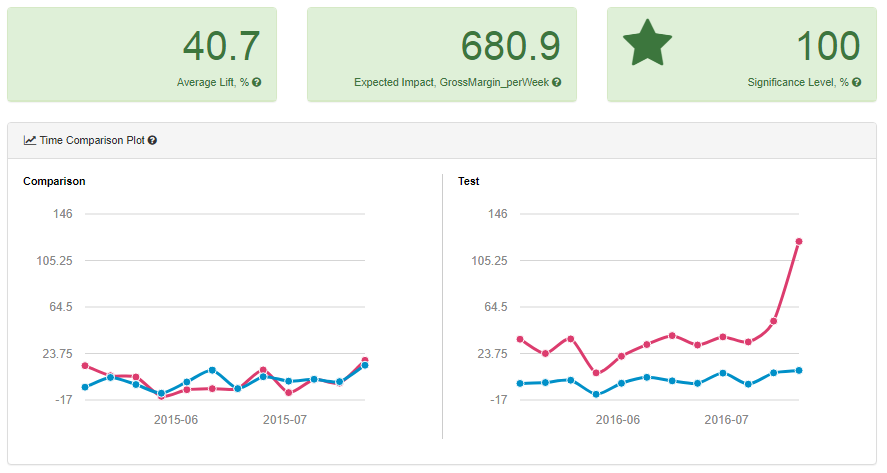
<center> Figure 7: An overall AB Analysis for all stores </center>